# Applied Data Science Capstone Project 
###  IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Methodology](#methodology)
    * [Area Studied](#area)
    * [K-Means](#kmeans)
    * [Foursquare Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The city of Tucson is located in the south of the state of Arizona in the United States. It is home of the 33rd largest population in the country, 2nd in its state, spread over 624 km2. Although it stands among the most populated cities, its population density of 888 people/km² is low, meaning that the city buildings are rather scattered over the area than condensed. The city has not grown as much vertically as horizontally, so, tall buildings are not so common. Moreover, the city stands in the Sonoran Desert, so temperatures around 40oC are common during 5 months, every year. 
Moving around the city can be difficult, given the aforementioned conditions. The aim of this project is to provide meaningful information about the density of of venues in different Tucson neighborhoods to provide support for several choices, such as suitable areas to live, depending on one’s need of public transportation, a potential good location for a business, priority areas for an enhancement in public transportation and other matters.  

## Methodology <a name="methodology"></a>

### Area Studied<a name="area"></a>

Neighborhood names were obtained from website: https://www.city-data.com/nbmaps/neigh-Tucson-Arizona.html.
We performed the web scraping as follows:

In [1]:
#Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.city-data.com/nbmaps/neigh-Tucson-Arizona.html'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

Using the "Inspect" tool, we found the names of neighborhoods are under the class "street-name", so, we extracted them as follows:

In [3]:
list_neigh = soup.find_all('span', class_ = 'street-name')
neighborhood = []
for item in list_neigh:
    neighborhood.append(item.text)
print(neighborhood)

['12th Avenue - Valencia Road', 'Armory Park', 'Avondale', 'Barrio Viejo', 'Central', 'Civano', 'Congress Street', 'Convention', 'Cragin-Keeling', 'Downtown', 'Eastside', 'El Encanto', 'El Presidio', 'Fairgrounds', 'Fourth Avenue', 'Menlo Park', 'Northwest', 'Old Fort Lowell', 'Old Pascua', 'Pullman', 'Sam Hughes', 'Santa Cruz Southwest', 'South Tucson', 'Sunnyside', 'University of Arizona Campus', 'Western Hills', 'Winter-haven']


Then, we obtained the neighborhoods' geographic coordinates: 

In [4]:
#Import libraries
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library


In [5]:
def findlatlon(add):
    coord=[]
    address = add + ', Tucson, AZ'
    #address = 'Armory Park, Tucson, AZ'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if location == None:
        coord == 'Not located'
    else:
        latitude = location.latitude
        longitude = location.longitude
        coord=[latitude,longitude]
    return coord


And stored them in a dataframe:

In [6]:
coordinates = []
for item in neighborhood:
    coordinates.append(findlatlon(item))
    
df_tus = pd.DataFrame(columns = ['Neighborhood','Latitude','Longitude'])  #creates the dataframe

for item in neighborhood:
    ind = neighborhood.index(item)
    neigh = item
    if (coordinates[ind]) == []:  # Writes zero where there's no info of lat lon
        lat = 0
        lon = 0
    else:
        lat = coordinates[ind][0]
        lon = coordinates[ind][1]
    df_tus = df_tus.append({'Neighborhood':neigh, 'Latitude':lat, 'Longitude':lon},ignore_index=True)


In [7]:
df_tus.head()

,Neighborhood,Latitude,Longitude
0,12th Avenue - Valencia Road,0,0
1,Armory Park,32.2153,-110.966
2,Avondale,0,0
3,Barrio Viejo,32.2142,-110.973
4,Central,32.2271,-110.972


As seen in the dataframe, some neighborhoods have no coordinates information in the geolocator, so we dropped them. 

In [185]:
df1 = df_tus.replace(0, np.nan)
df_tus = df1.dropna(how='any', axis=0)
df_tus

,Neighborhood,Latitude,Longitude
1,Armory Park,32.215319,-110.965879
3,Barrio Viejo,32.214224,-110.973130
4,Central,32.227055,-110.971783
5,Civano,32.147808,-110.764803
6,Congress Street,32.222333,-110.966709
7,Convention,32.218581,-110.974439
9,Downtown,32.215691,-110.962312
10,Eastside,32.236059,-110.830288
11,El Encanto,32.241355,-110.848053
12,El Presidio,32.225158,-110.976240


We could then plot the neighborhood locations on a map:

In [10]:
#First find city's central coordinates:

address = 'Tucson, AZ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitudec = location.latitude
longitudec = location.longitude
print(latitudec, longitudec)

32.2228765 -110.9748477


In [13]:
#Then plot the map
map_tucson_ng = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_tus['Latitude'], df_tus['Longitude'], df_tus['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  

map_tucson_ng

The map shows us that there are 13 neighborhoods scattered around the city and 8 neighborhoods close to each other on the central area. As we wanted to analyze neighborhoods distant enough so there is no data overlap, we performed a K-Means clusterization to group the neighborhoods that are close together. We already know the number of clusters we wanted (14), so we did not perform the elbow or silhouette metrics to chose the best number of clusters, because it was unnecessary in our case. 

### K-Means <a name="kmeans"></a>

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

We created a dataframe with only latitude and longitude to input the model:

In [35]:
number_clusters = 14
latlon = df_tus.drop(['Neighborhood'], axis = 'columns')
modelo = KMeans(n_clusters = number_clusters, random_state = 300)
cneigh = modelo.fit(latlon)

In [36]:
clusters = modelo.fit_predict(latlon)
centers = modelo.cluster_centers_

In [37]:
clst = [*range(0,number_clusters)]
df_clst = pd.DataFrame(centers, columns = ['Lat','Lon']) 
df_clst.insert(2, 'Cluster', clst)
df_clst

,Lat,Lon,Cluster
0,32.218581,-110.974439,0
1,34.897006,-82.452947,1
2,32.044750,-110.712940,2
3,32.241355,-110.848053,3
4,32.147808,-110.764803,4
5,32.271535,-110.927806,5
6,32.143406,-110.945758,6
7,32.229098,-110.935407,7
8,32.260881,-110.886013,8
9,32.243994,-110.964904,9


The cursterized neighborhoods can be seen on the map:

In [38]:
map_tucson_ng = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_tus['Latitude'], df_tus['Longitude'], df_tus['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  


for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  

map_tucson_ng

### Foursquare Data<a name="data"></a>

In [188]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
ACCESS_TOKEN =  # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

SyntaxError: invalid syntax (<ipython-input-188-7c1282271c9a>, line 1)

We got the information of venues from Foursquare and saved them in CSV files so we could access them later without the need to make requests from API. Several requests were made, using different radius for each search. The values of radius were: 3000m, 1000m, 500m and 100m for each cluster centroid.

In [52]:
results_lista = [] 
radius = 100

for index in df_clst.index:
    latitude = df_clst['Lat'][index]
    longitude = df_clst['Lon'][index]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    results_lista.append(requests.get(url).json())    

In [76]:
venues_total = pd.DataFrame(columns = ['IDN','ID','Name','Categories','CatID','Lat','Lon','Distance'])
indneig = 0   # index of neighborhood (after clustering)
for item in results_lista:   #for within neighborhoods
    venues = (item['response']['venues'])
    for item2 in venues:   #for within venues
        ID = item2['id']
        Name = item2['name']
        Cat = item2['categories']
        Lati = item2['location']['lat']
        Long = item2['location']['lng']
        Dist = item2['location']['distance']
        try:
            Cat1 = item2['categories'][0]['name']
            Catid = item2['categories'][0]['id']
        except:
            Cat1 = "NaN"
            Catid ="NaN"
        venues_total = venues_total.append({'IDN':indneig,'ID':ID, 'Name':Name,'Categories':Cat1,'CatID':Catid,'Lat':Lati,'Lon':Long,'Distance':Dist},ignore_index=True)
    indneig = indneig+1 


Then, stored the results in a dataframe containing venues information and index of clusterized neighborhoods.

In [77]:
venues_total.head()

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance
0,0,4e0bc8d1ae606c2b4e17cc79,Tucson Arena,Hockey Arena,4bf58dd8d48988d185941735,32.218451,-110.973740,67
1,0,4b0586d1f964a520ef6f22e3,Tucson Convention Center,Convention Center,4bf58dd8d48988d1ff931735,32.217809,-110.974030,94
2,0,4db4815da86e8d270786641c,Common Grounds,Coffee Shop,4bf58dd8d48988d1e0931735,32.218039,-110.974939,76
3,0,56da8cdb498e53f5fde2ca89,Tcc North Exhibit Hall,Music Venue,4bf58dd8d48988d1e5931735,32.218178,-110.974281,47
4,0,4b0586d9f964a520587122e3,Tucson Convention Center Ballroom,Dance Studio,4bf58dd8d48988d134941735,32.218466,-110.973723,68


In [55]:
venues_total.to_csv('Venues_R100.csv')

Then we joined all searches in the same dataframe:

In [141]:
df1 = pd.read_csv('Venues_R3000.csv')
df2 = pd.read_csv('Venues_R1000.csv')
df3 = pd.read_csv('Venues_R500.csv')
df4 = pd.read_csv('Venues_R100.csv')
frames = [df1,df2, df3, df4]
df_total = pd.concat(frames, sort=False)
df_total.drop(df_total.columns[[0]],axis = 1,inplace = True)

We got rid of duplicated rows using:

In [142]:
df_total = df_total.drop_duplicates(subset=None,keep='first')

We saved category data for further analyzis, but it wasn't used in this work, so we dropped the columns related to it 

In [143]:
df_total = df_total.drop(['ID','CatID','Categories','Name'], axis = 'columns')
df_total

,IDN,Lat,Lon,Distance
0,0,32.218451,-110.973740,67
1,0,32.217809,-110.974030,94
2,0,32.218039,-110.974939,76
3,0,32.218178,-110.974281,47
4,0,32.218466,-110.973723,68
...,...,...,...,...
1460,13,32.234820,-110.835177,480
1461,13,32.235180,-110.826112,405
1462,13,32.233183,-110.837475,748
1463,13,32.234378,-110.822928,717


## Analysis <a name="analysis"></a>

We plotted all the venues around its neighborhoods:

In [79]:
map_tucson_venues = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(df_total['Lat'], df_total['Lon'], df_total['IDN']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  
for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  


map_tucson_venues

As we can see, the neighborhoods on the south of the city presented a lower venue density than the neighborhoods on the noth and central parts.

In [161]:
average = []
std_dev = []
for location in clst:
    filter1 = df_total["IDN"]== location
    fil = df_total.where(filter1, inplace = False)
    stats = fil.describe()  
    average.append(stats['Distance'][1])
    std_dev.append(stats['Distance'][2])


## Results and Discussion <a name="results"></a>

In [174]:
# Define labels, positions, bar heights and error bar heights
labels = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14']
x_pos = np.arange(len(labels))
CTEs = average
error = std_dev

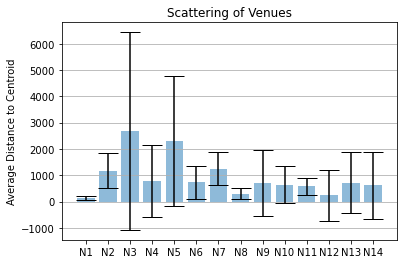

<Figure size 2160x216 with 0 Axes>

In [184]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average Distance to Centroid')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Scattering of Venues')
ax.yaxis.grid(True)

# Save the figure and show
plt.figure(figsize=(30, 3))
#plt.figure(figsize=(20,8))
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

It is clear from the figure above that neighborhoods 3 and 5 presented a low density of venues. That means a person needs to travel long distances to get to service building, schools, shops, restaurants and recreational sites. This implies that individuals who chose to live in those areas probably have their own means of transportation. These might also be suitable areas for opening delivery business.   
In the other hand, those who chose to live in neighborhoods 1 and 8 probably have access to most of what they need by walking or biking. The other neighborhoods presented an intermediate density of venues. 

## Conclusion <a name="conclusion"></a>

We identified how venue density is geographically spread over the city. For further analysis, we recommend to include venues cathegory to further understand the geographical distribution of venues within the city.